<img src="../img/logo.png"/>

<h1 style="margin: 0; padding: 0;"><center>Club de Programación e Inteligencia Artificial</center></h1>

<center><i>Una iniciativa de los estudiantes y egresados del Programa de Ingeniería de Sistemas de la Universidad del Magdalena</i></center>

<br/><br/>

<center> <strong> === </strong> </center>


 #  <center>Módulo 10 - Procesamiento Digital de Imágenes y Visión por Computadora. </center>

## Unidad 01: Introducción al procesamiento digital de imágenes y algunas aplicaciones.


### Objetivos Generales
Sentar los fundamentos para el estudio del procesamiento digital de imágenes y la visión por computadora.

### Objetivos Específicos
* Definir el procesamiento digital de imágenes.
* Aclarar las diferencias entre el procesamiento digital de imágenes y la visión por computador.
* Demostrar las operaciones básicas del procesamiento digital de imágenes.
* Explorar algunas aplicaciones recientes del procesamiento digital de imágenes.


> #### <font color='green'>*Los textos en verde constituyen buenas prácticas a tener en cuenta. *</font>
> #### <font color='orange'>*Los textos en amarillo son informaciones útiles pero no imprescindibles. *</font>
> #### <font color='red'>*Los textos en rojo son advertencias sobre posibles errores y cómo evitarlos. *</font>


## Procesamiento digital de imagenes
<br>
La adquisicion y procesamiento de imagenes se ha convertido en un metodo estandar para cuantificar y cualificar medidas a partir de <b>informacion visual</b>, lo cual encuentra su utilidad en varias disciplinas como la ciencia, 
tecnologia, ingenieria o matematicas.
<br>
<br>
"El interes de los metodos de procesamiento de imagenes digitales se fundamenta en dos areas principales de aplicacion: a) la mejora de la calidad para la intepretacion humana; b) el procesamiento de los datos de la escena para la percepcion de la maquina de forma autonoma" <a href='https://www.casadellibro.com/libro-vision-por-computador-imagenes-digitales-y-aplicaciones-incluye-cd-rom/9788478974726/772925'>Gonzalo Pajares</a>.

<br>
<center><i>Figura. Conceptos Relacionados.</i></center>
<img src="res/conceptos.png" alt="Conceptos Relacionados" style="width:400px">
<br>
El procesamiento de imagenes digitales o procesamiento digital de imagenes (PDI), tiene relacion con otros conceptos ampliamentes abordados en la literatura cientifica, tales como analisis de imagenes, vision por computador, vision artificial o reconocimiento de patrones, sin embargo, no son conceptos homologables. 
<br><br>
El PDI se podria entender como el tratamiento que se realiza a una imagen de entrada, de forma tal que producto de este tratamiento se obtenga una nueva imagen que este' en condiciones de ser facilmente interpretada para una tarea humana o que disminuya el trabajo computacional de un posterior analisis de la misma.
<br>
<center><i>Figura. Etapas de un sistema de vision por computador tradicional.</i></center>
<img src="res/etapas.png" alt="Conceptos Relacionados" style="width:600px">
<br>
La distincion entre procesamiento digital de imagenes y analisis de imagenes no es obvia, sin embargo, el procesamiento de imagenes puede ser visto como una <b>transformacion de una imagen en otra imagen</b>.
<br>
<center><i>Ecuacion. Transformacion de una imagen.</i></center>
<center><h2>$G = F(I)$</h2></center>
<br>
Dadas una imagen de entrada <i>I</i> y una funcion de transformacion <i>F</i>, el procesamiento de imagenes consiste en aplicar dicha transformacion a la imagen de entrada, para obtener una imagen resultante <i>G</i>, tal que dicha imagen sea de utilidad para una determinada tarea.
<br><br>
A continuacion algunos ejemplos:
<hr>

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data, filters, util, io
from skimage.morphology import disk

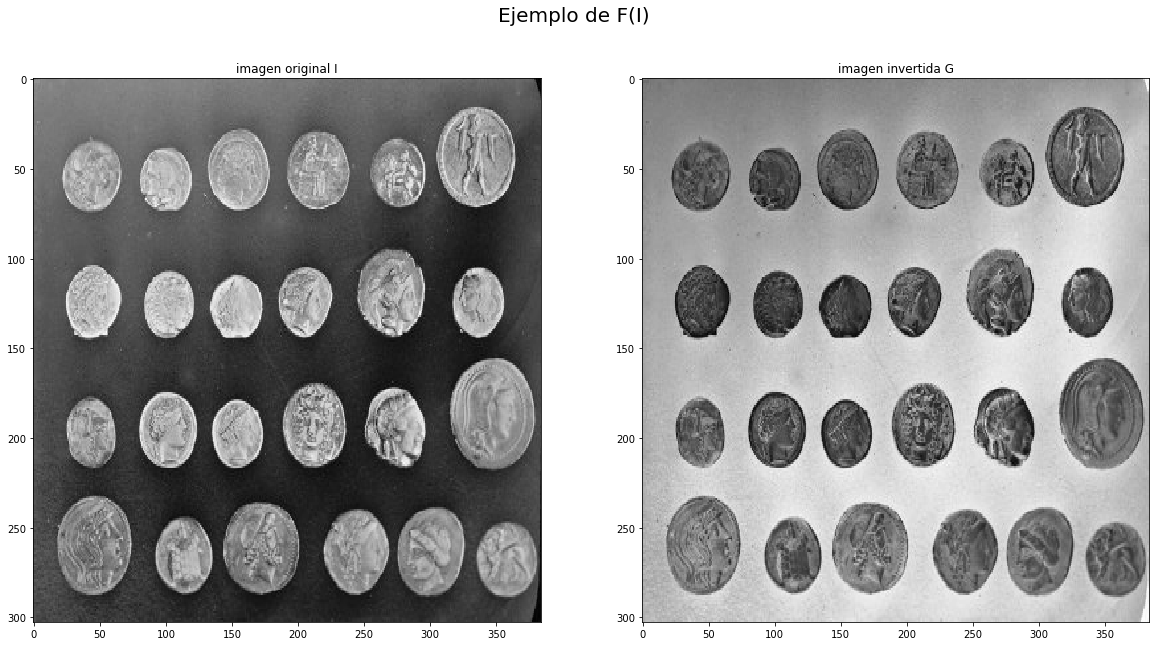

In [3]:
# Ejemplo 1

def F(I):
    return 255 - I

I = data.coins()
G = F(I)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))

fig.suptitle('Ejemplo de F(I)', fontsize=20)
ax1.set_title('imagen original I')
ax1.imshow(I, cmap='gray', aspect='auto')
ax2.set_title('imagen invertida G')
ax2.imshow(G, cmap='gray', aspect='auto')

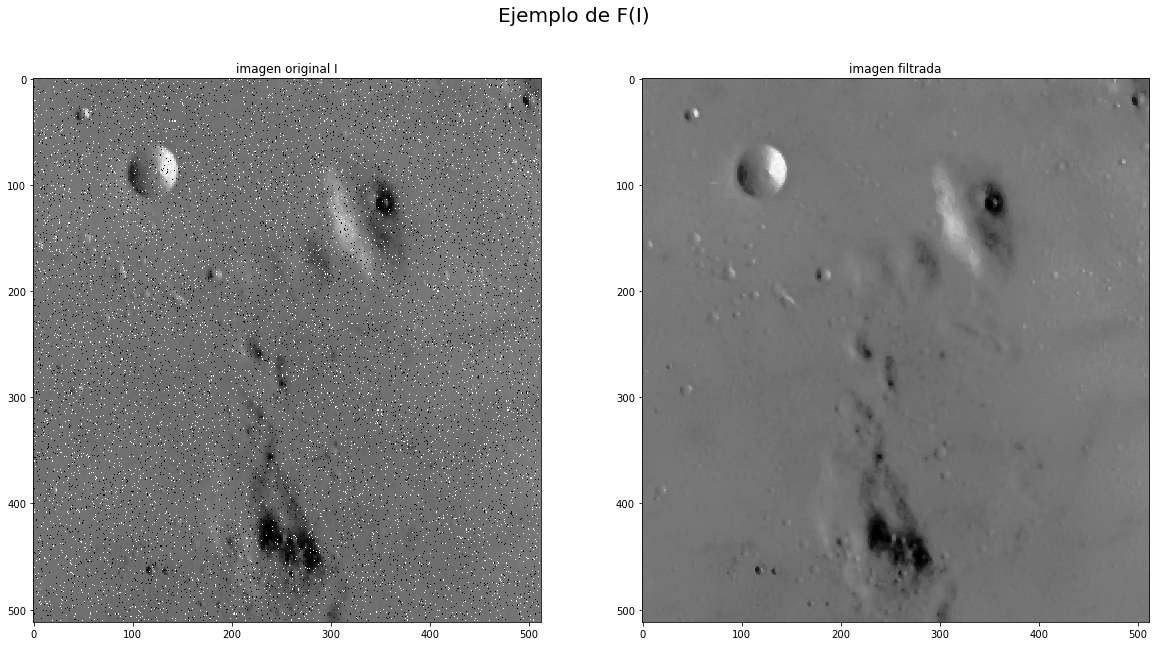

In [6]:
# Ejemplo 2

def F(I):
    #filtrado de ruido
    return filters.median(I, disk(2))

I = util.random_noise(data.moon(), mode='s&p')
G = F(I)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))

fig.suptitle('Ejemplo de F(I)', fontsize=20)
ax1.set_title('imagen original I')
ax1.imshow(I, cmap='gray', aspect='auto')
ax2.set_title('imagen filtrada')
ax2.imshow(G, cmap='gray', aspect='auto')

<hr>
Nuestra funcion de transformacion de imagenes tambien puede realizar operaciones con multiples imagenes, es decir, un transformacion de procesamiento de imagenes no se limita exclusivamente a una imagen de entrada.
<br><br>
En este caso, nuestra funcion se transforma en:
<center><i>Ecuacion. Funcion de transformacion depedendiente de multiples imagenes.</i></center>
<center><h2>$G = F(I_1, I_2, I_3,...,I_n)$</h2></center>
<hr>

In [18]:
from skimage.transform import resize

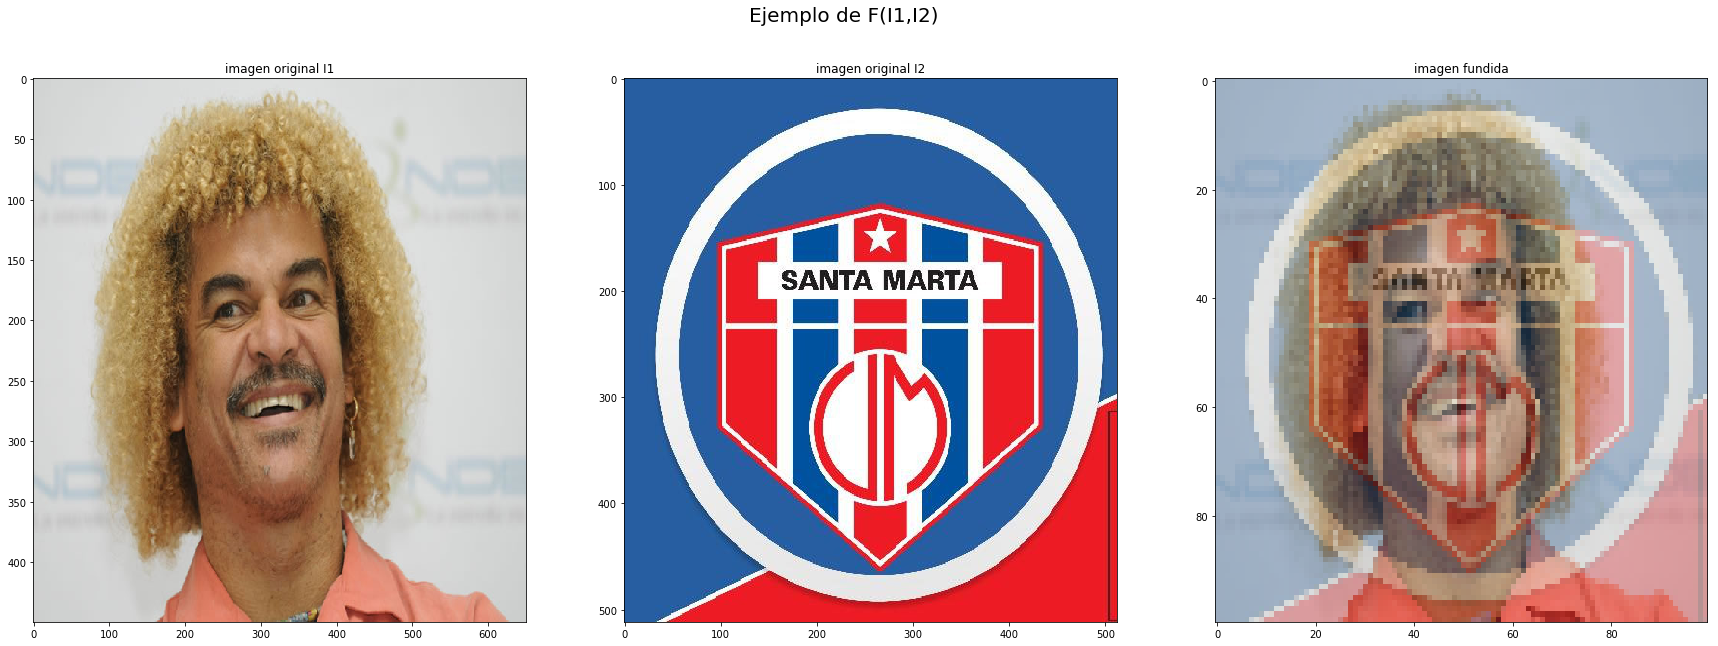

In [19]:
def F(I1,I2):
    I1 = resize(I1,(100,100))
    I2 = resize(I2,(100,100))
    k = 0.3
    return (1-k) * I1 + k * I2

I1 = io.imread('res/pibe.jpg')
I2 = io.imread('res/union.jpg')
G = F(I1,I2)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30, 10))

fig.suptitle('Ejemplo de F(I1,I2)', fontsize=20)
ax1.set_title('imagen original I1')
ax1.imshow(I1, cmap='gray', aspect='auto')
ax2.set_title('imagen original I2')
ax2.imshow(I2, cmap='gray', aspect='auto')
ax3.set_title('imagen fundida')
ax3.imshow(G, cmap='gray', aspect='auto')

<center><i>Figura. Ejemplos de segmentacion.</i></center>
<img src="res/segmentacion.png" alt="Ejemplos de segmentacion" style="width:800px">

Una tarea de gran interes y dinamica dentro de la comunidad de PDI es la segmentacion, la cual consiste en subdividir la imagen de entrada <i>I</i> en regiones que contienen objetos unicos. En este caso nuestra funcion <i>F</i> se transforma en:
<br><br>
<center><i>Ecuacion. Funcion de segmentacion.</i></center>
<center><h2>$G[k] = F(I,k)$</h2></center>
<br><br>
donde <i>G</i> ahora es un vector con subimagenes de la imagen original.
<br><br>
Consideran que la segmentacion de imagenes hace parte de una tarea de procesamiento digital de imagenes o requiere un nivel superior de procesamiento?
<br><br>
<center><i>Figura. Cuantos segmentos podria extraer de esta imagen?.</i></center>
<img src="res/hidden-leopard.jpg" alt="Ejemplos de segmentacion" style="width:800px">
<br><br>
<center><b>¿Qué resultado hubiese tenido el proceso de segmentación si se hubiese sabido que en la imagen hay un leopardo?</b><center>
<hr>

<hr>
Si bien diversas ramas de la ciencia e ingenieria encuentran casos de aplicacion del PDI y la vision por computador, la industria del entretenimiento y de la publicidad genera la mayor cantidad de avances tecnologicos en estos tiempos.
<center><a href='http://perso.crans.org/frenoy/matlab2012/seamcarving.pdf'>Seam Carving</a></center>
<img src="res/seam_carving.png" alt="seam carving" style="width:1000px">
<br><br>
La inteligencia artificial ha encontrado recientemente aplicacion en el PDI y es uno de los topicos <b>hot</b> en PDI: <a href='https://blog.google/products/google-plus/saving-you-bandwidth-through-machine-learning/'>Rapid and Accurate Image Super Resolution</a>
<br><br>
<center><i>Figura. Ejemplo de Google RAISR.</i></center>
<img src="res/RAISR.png" alt="Google RAISR" style="width:800px">
<br><br>
Diversas conferencias cientificas tales como SIGGRAPH, generan constante avances en PDI.
<br><br>
<a href='https://www.youtube.com/watch?v=ONZcjs1Pjmk'>Eulerian Video Amplification</a>
<br><br>
### Conclusion
Para resumir, el procesamiento de imagenes digitales trata con las transformaciones y operaciones realizadas sobre una imagen o conjunto de imagenes con el objetivo de mejorar la calidad de la informacion en terminos de su contraste nitidez, o limpieza, realizar transformaciones espaciales y extraer objetos o caracteristicas de interes tales como segmentos o bordes. 
<hr>

# Nota

> Estos materiales fueron adaptados de los cursos de Procesamiento Digital de Imágenes y Visión por Computador de los profesores Pedro Atencio Ortiz, Diego Patiño del Instituto Tecnológico Metropolitano y Carlos Mera de la Universidad de Medellín. A ellos rendimos crédito.